In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
bitcoin_tables = [
    pd.read_csv("results/iterations/with_preprocessing/random_iteration_bitcoin.csv"),
    pd.read_csv("results/iterations/without_preprocessing/random_iteration_bitcoin.csv"),
    pd.read_csv("results/iterations/with_preprocessing/sequential_iteration_bitcoin.csv"),
    pd.read_csv("results/iterations/without_preprocessing/sequential_iteration_bitcoin.csv"),
    pd.read_csv("results/iterations/with_preprocessing/ldg_iteration_bitcoin.csv"),
    pd.read_csv("results/iterations/without_preprocessing/ldg_iteration_bitcoin.csv")]

twitter_tables = [
    pd.read_csv("results/iterations/with_preprocessing/random_iteration_twitter.csv"),
    pd.read_csv("results/iterations/without_preprocessing/random_iteration_twitter.csv"),
    pd.read_csv("results/iterations/with_preprocessing/sequential_iteration_twitter.csv"),
    pd.read_csv("results/iterations/without_preprocessing/sequential_iteration_twitter.csv"),
    pd.read_csv("results/iterations/with_preprocessing/ldg_iteration_twitter.csv"),
    pd.read_csv("results/iterations/without_preprocessing/ldg_iteration_twitter.csv")]

nash_tables = [
    pd.read_csv("results/iterations/with_preprocessing/random_iteration_nash.csv"),
    pd.read_csv("results/iterations/without_preprocessing/random_iteration_nash.csv"),
    pd.read_csv("results/iterations/with_preprocessing/sequential_iteration_nash.csv"),
    pd.read_csv("results/iterations/without_preprocessing/sequential_iteration_nash.csv"),
    pd.read_csv("results/iterations/with_preprocessing/ldg_iteration_nash.csv"),
    pd.read_csv("results/iterations/without_preprocessing/ldg_iteration_nash.csv"),]

In [3]:
tables = [bitcoin_tables, twitter_tables, nash_tables]
table_names = ["Bitcoin OTC", "Twitter", "Nashville Network"]
algortihms_names = ["Random", "Sequential", "LDG"]
preprocessing_names = ["Without Preprocessing", "With Preprocessing"]
color_l = ["b", "r", "g"]
style_l = ["dotted", "solid"]

Bitcoin OTC Random With Preprocessing
1 1 0
Bitcoin OTC Random Without Preprocessing
1 0 1
Bitcoin OTC Sequential With Preprocessing
2 1 2
Bitcoin OTC Sequential Without Preprocessing
2 0 3
Bitcoin OTC LDG With Preprocessing
3 1 4
Bitcoin OTC LDG Without Preprocessing
3 0 5


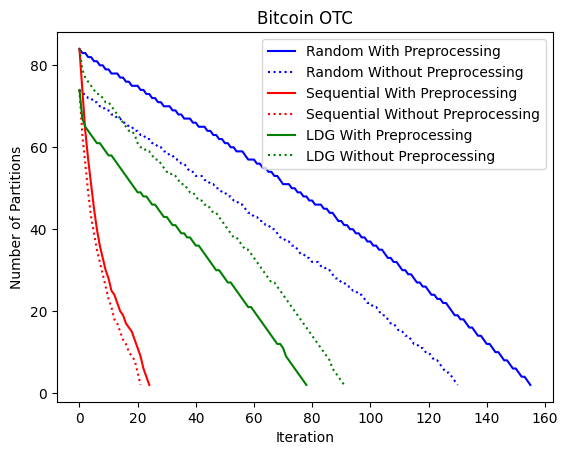

Twitter Random With Preprocessing
1 1 0
Twitter Random Without Preprocessing
1 0 1
Twitter Sequential With Preprocessing
2 1 2
Twitter Sequential Without Preprocessing
2 0 3
Twitter LDG With Preprocessing
3 1 4
Twitter LDG Without Preprocessing
3 0 5


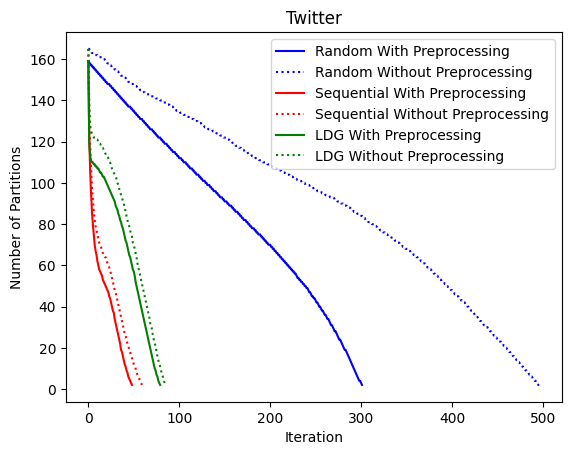

Nashville Network Random With Preprocessing
1 1 0
Nashville Network Random Without Preprocessing
1 0 1
Nashville Network Sequential With Preprocessing
2 1 2
Nashville Network Sequential Without Preprocessing
2 0 3
Nashville Network LDG With Preprocessing
3 1 4
Nashville Network LDG Without Preprocessing
3 0 5


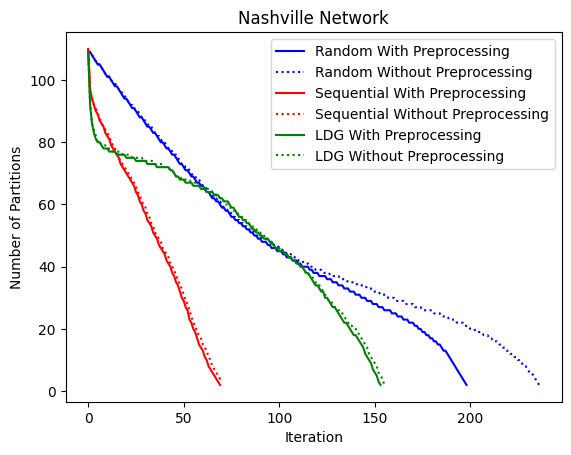

In [6]:
for i in range(3):
  for j in range(1, 4):
    for k in range(1, -1, -1):
      ypoints = tables[i][(j*2)-k-1]["#partitions"].to_list()
      print(table_names[i] + " " + algortihms_names[j - 1] + " " + preprocessing_names[k])
      print(j, k, (j*2)-k-1)
      plt.plot(ypoints, linestyle = style_l[k], color=color_l[j-1], label = algortihms_names[j - 1] + " " + preprocessing_names[k])
      plt.legend(loc="upper right")
      plt.title(table_names[i])
  plt.xlabel("Iteration")
  plt.ylabel("Number of Partitions")
  plt.show()

In [13]:
df = pd.read_csv("results/iterations/with_preprocessing/optimum.csv")


In [14]:
df

,graph,partitioning,# phases optimum,# phases 1 iteration,# phases without preprocessing
0,twitter,LDG,80,80,86
1,twitter,Random,301,302,497
2,twitter,Sequential,50,49,60
3,bitcoin,LDG,77,79,92
4,bitcoin,Random,134,156,131
5,bitcoin,Sequential,21,25,22
6,nash,LDG,154,154,156
7,nash,Random,194,199,237
8,nash,Sequential,70,70,71


In [15]:
d = df.set_index("partitioning").groupby("graph")
titles = ["Bitcoin OTC", "Nashville Network", "Twitter"]

graph
bitcoin    Axes(0.125,0.11;0.775x0.77)
nash       Axes(0.125,0.11;0.775x0.77)
twitter    Axes(0.125,0.11;0.775x0.77)
dtype: object

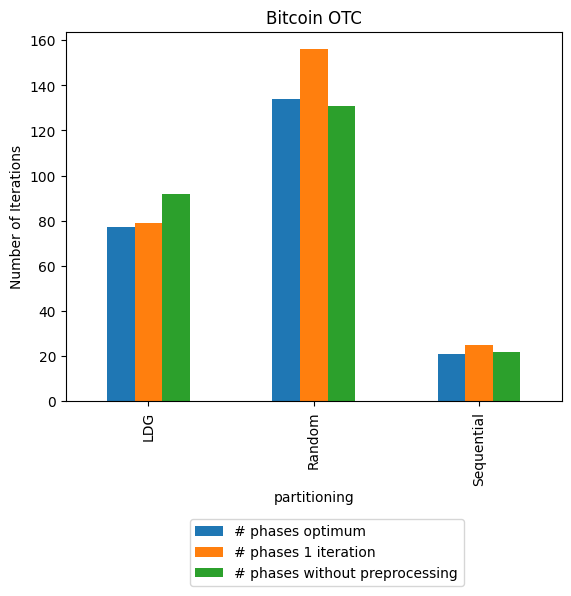

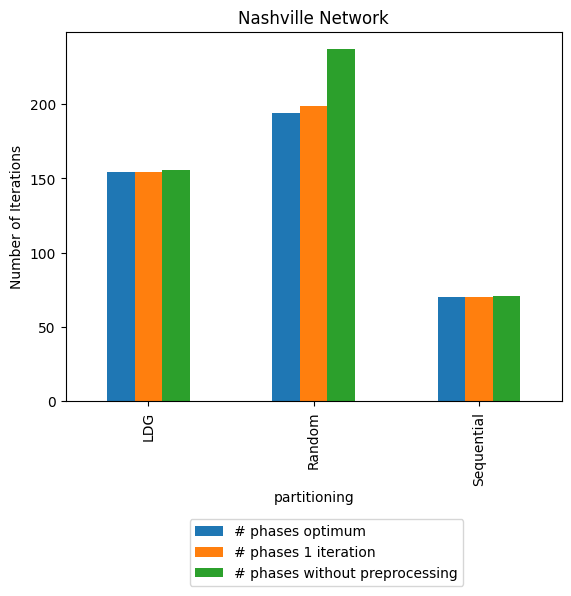

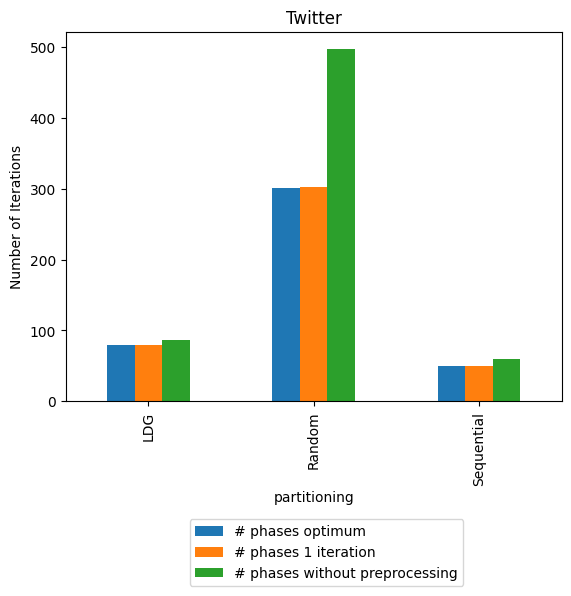

In [17]:
pl = d.plot.bar()
count = 0
for gr in pl:
    gr.set_title(f'{titles[count]}')
    gr.set_ylabel("Number of Iterations")
    gr.legend(loc=(0.25,-0.5))
    count += 1
pl